In [1]:
# I'm importing pandas and numpy for data processing and linear algebra
import pandas as pd
import numpy as np

In [2]:
#Reading the csv file and set up content inside a Dataframe, low_memory=False to avoid warning
dfZika = pd.read_csv("cdc_zika.csv", low_memory=False)

In [3]:
#Using head() to check columns name and a preview of the first rows
dfZika.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [4]:
#Checking the column names
dfZika.columns

Index(['report_date', 'location', 'location_type', 'data_field',
       'data_field_code', 'time_period', 'time_period_type', 'value', 'unit'],
      dtype='object')

In [5]:
#Finding out general information of file
dfZika.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107619 entries, 0 to 107618
Data columns (total 9 columns):
report_date         107612 non-null object
location            107612 non-null object
location_type       107612 non-null object
data_field          107612 non-null object
data_field_code     107612 non-null object
time_period         0 non-null float64
time_period_type    0 non-null float64
value               107481 non-null object
unit                107612 non-null object
dtypes: float64(2), object(7)
memory usage: 7.4+ MB


In [6]:
#Counting the number of rows that contain values
dfZika.count()

report_date         107612
location            107612
location_type       107612
data_field          107612
data_field_code     107612
time_period              0
time_period_type         0
value               107481
unit                107612
dtype: int64

In [7]:
#Looking for nulls
pd.isnull(dfZika).sum(axis = 0)

report_date              7
location                 7
location_type            7
data_field               7
data_field_code          7
time_period         107619
time_period_type    107619
value                  138
unit                     7
dtype: int64

In [8]:
#The fiels time_period and time_period_type are optional and not relevant for my research, so I will drop those columns.
dfZika.drop(columns=['time_period','time_period_type'],axis=1, inplace=True)

In [9]:
dfZika.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107619 entries, 0 to 107618
Data columns (total 7 columns):
report_date        107612 non-null object
location           107612 non-null object
location_type      107612 non-null object
data_field         107612 non-null object
data_field_code    107612 non-null object
value              107481 non-null object
unit               107612 non-null object
dtypes: object(7)
memory usage: 5.7+ MB


In [10]:
#I want to count the missing data by Column

missingdf = pd.DataFrame(dfZika.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(dfZika)
missingdf

,total,percent
report_date,7,0.000065
location,7,0.000065
location_type,7,0.000065
data_field,7,0.000065
data_field_code,7,0.000065
value,138,0.001282
unit,7,0.000065


In [11]:
# I can see, There is 138 missing for the value column and as I cannot figure out these values, my
# decision is to remove those rows.It will not affect my research.
# I will keep the good ones rows (not missing data) for value column and report date, as well.
notmissingdata = np.logical_and(pd.notnull(dfZika['report_date']),
                           pd.notnull(dfZika['value'])) 
dfZika = dfZika[notmissingdata]

In [12]:
#Checking again the missing data by Column

missingdf = pd.DataFrame(dfZika.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(dfZika)
missingdf

,total,percent
report_date,0,0.0
location,0,0.0
location_type,0,0.0
data_field,0,0.0
data_field_code,0,0.0
value,0,0.0
unit,0,0.0


In [13]:
dfZika.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [14]:
#Now it is time to convert report_date to Datetime dtype. Also, replacing (_) underscore by dash(-)
dfZika['report_date'] = [x.replace('_', '-') for x in dfZika['report_date']]
dfZika['report_date'] = pd.to_datetime(dfZika['report_date'],format='%Y-%m-%d')

In [15]:
#I want to check that the report_date column now is Datetime
dfZika.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107481 entries, 0 to 107618
Data columns (total 7 columns):
report_date        107481 non-null datetime64[ns]
location           107481 non-null object
location_type      107481 non-null object
data_field         107481 non-null object
data_field_code    107481 non-null object
value              107481 non-null object
unit               107481 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 6.6+ MB


In [16]:
dfZika.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [17]:
# Converting value column to numeric
dfZika['value'] = pd.to_numeric(dfZika['value'], 'coerce')
#Looking for nulls after use the "coerce"
pd.isnull(dfZika).sum(axis = 0)

report_date        0
location           0
location_type      0
data_field         0
data_field_code    0
value              3
unit               0
dtype: int64

In [18]:
#Cleaning again NaN from value column
notmissingdata = np.logical_and(pd.notnull(dfZika['report_date']),
                           pd.notnull(dfZika['value'])) 
dfZika = dfZika[notmissingdata]

In [19]:
#Checking again the missing data by Column

missingdf = pd.DataFrame(dfZika.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(dfZika)
missingdf

,total,percent
report_date,0,0.0
location,0,0.0
location_type,0,0.0
data_field,0,0.0
data_field_code,0,0.0
value,0,0.0
unit,0,0.0


In [20]:
#Getting a preview of the rows after converting value column to numeric
dfZika.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0.0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2.0,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1.0,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127.0,cases


Text(0.5, 1.0, 'Top 10 Locations where Zika virus was reported')

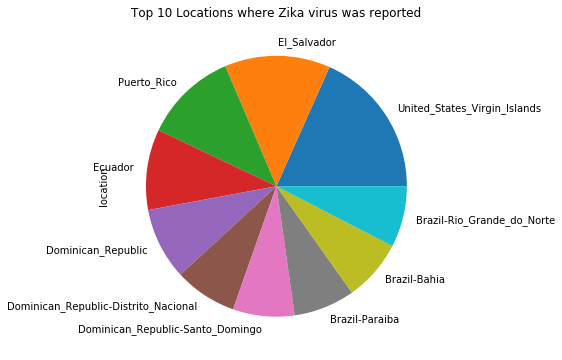

In [21]:
#Now I think my dataframe is clean, I will create a plot just to see how it looks.

%matplotlib inline
import matplotlib.pyplot as plt


dfZika.location.value_counts()[:10].plot(kind='pie', figsize=(6, 6))
plt.title("Top 10 Locations where Zika virus was reported")
